In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


605

In [23]:
cities_list = pd.DataFrame({"city": cities})
row_counter = 1
cities_list.head()

,city
0,kalengwa
1,vanavara
2,bilibino
3,thompson
4,vaini


In [4]:
#make API calls and collect data
# OpenWeatherMap API Key
api_key = api_keys.weather_api_key

base_url="http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="
weather_data=[]
record_counter=1

for index, row in cities_list.iterrows():
        
        city_q=row["city"]
        response = requests.get(query_url + city_q).json()
        
        print(query_url + city_q)
        try:
            temp=response["main"]["temp"]
            humid=response["main"]["humidity"]
            cloud=response["clouds"]["all"]
            wind=response["wind"]["speed"]
            city_lat=response["coord"]["lat"]
            city_lon=response["coord"]["lon"]
            city_name=response["name"]
            city_country=response["sys"]["country"]
            weather_data.append({"City": city_name, "Country": city_country, "Latitude": city_lat,"Longitude": city_lon,
                                "Temperature (F)": temp, "Humidity (%)": humid, "Cloudiness (%)":cloud, "Wind Speed (MPH)": wind})
            print (f"Pulling data for: {record_counter} | {city_q}")
            print (f'{base_url}appid=***masked***&units={units}&q={city_q}')
            print ("###########################################################################")
            record_counter +=1
        except (KeyError, IndexError):
            print (f"Weather for {city_q} not found.")
            print ("###########################################################################")

http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=punta arenas
Pulling data for: 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=punta arenas
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=mar del plata
Pulling data for: 2 | mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=mar del plata
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=temaraia
Weather for temaraia not found.
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=rikitea
Pulling data for: 3 

http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=ushuaia
Pulling data for: 26 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ushuaia
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=manokwari
Pulling data for: 27 | manokwari
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=manokwari
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=thompson
Pulling data for: 28 | thompson
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=thompson
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565d

http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=nanortalik
Pulling data for: 50 | nanortalik
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=nanortalik
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=copiapo
Pulling data for: 51 | copiapo
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=copiapo
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=swiebodzice
Pulling data for: 52 | swiebodzice
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=swiebodzice
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid

http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=port hardy
Pulling data for: 76 | port hardy
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=port hardy
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=hermanus
Pulling data for: 77 | hermanus
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hermanus
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=krutinka
Pulling data for: 78 | krutinka
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=krutinka
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=44564

http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=labuhan
Pulling data for: 100 | labuhan
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=labuhan
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=qaanaaq
Pulling data for: 101 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=qaanaaq
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=yokadouma
Pulling data for: 102 | yokadouma
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=yokadouma
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565d

http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=ye
Weather for ye not found.
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=jalu
Pulling data for: 124 | jalu
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=jalu
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=rawson
Pulling data for: 125 | rawson
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=rawson
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=cherskiy
Pulling data for: 126 | cherskiy
http://api.openweathermap.org/data/2.5/

http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=kahului
Pulling data for: 148 | kahului
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=kahului
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=laguna
Pulling data for: 149 | laguna
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=laguna
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=standerton
Pulling data for: 150 | standerton
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=standerton
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565d

http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=meadow lake
Pulling data for: 175 | meadow lake
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=meadow lake
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=tabiauea
Weather for tabiauea not found.
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=sao felix do xingu
Pulling data for: 176 | sao felix do xingu
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=sao felix do xingu
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=chuy
Pulling

http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=kushima
Pulling data for: 199 | kushima
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=kushima
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=trincomalee
Pulling data for: 200 | trincomalee
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=trincomalee
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=tasiilaq
Pulling data for: 201 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=tasiilaq
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=44

http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=guerrero negro
Pulling data for: 224 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=guerrero negro
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=tazovskiy
Pulling data for: 225 | tazovskiy
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=tazovskiy
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=bethel
Pulling data for: 226 | bethel
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=bethel
###########################################################################
http://api.openweathermap.org/data/2.5/weather

http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=hokitika
Pulling data for: 250 | hokitika
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hokitika
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=xinqing
Pulling data for: 251 | xinqing
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=xinqing
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=aketi
Pulling data for: 252 | aketi
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=aketi
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3

http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=quang ngai
Pulling data for: 276 | quang ngai
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=quang ngai
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=oktyabrskoye
Pulling data for: 277 | oktyabrskoye
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=oktyabrskoye
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=mangochi
Pulling data for: 278 | mangochi
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=mangochi
###########################################################################
http://api.openweathermap.org/data/2.5/weat

http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=saint-augustin
Pulling data for: 301 | saint-augustin
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=saint-augustin
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=gangotri
Weather for gangotri not found.
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=kaka
Pulling data for: 302 | kaka
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=kaka
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=talnakh
Pulling data for: 303 | talnakh
http:

http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=matagami
Pulling data for: 326 | matagami
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=matagami
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=hamilton
Pulling data for: 327 | hamilton
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hamilton
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=bontang
Pulling data for: 328 | bontang
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=bontang
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565d

http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=hasaki
Pulling data for: 353 | hasaki
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hasaki
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=byron bay
Pulling data for: 354 | byron bay
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=byron bay
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=tommot
Pulling data for: 355 | tommot
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=tommot
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd363

http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=mahebourg
Pulling data for: 379 | mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=mahebourg
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=kununurra
Pulling data for: 380 | kununurra
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=kununurra
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=shangzhi
Pulling data for: 381 | shangzhi
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=shangzhi
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=44

http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=lasa
Pulling data for: 402 | lasa
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=lasa
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=husavik
Pulling data for: 403 | husavik
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=husavik
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=kalaleh
Pulling data for: 404 | kalaleh
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=kalaleh
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e43623

http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=sainte-suzanne
Pulling data for: 427 | sainte-suzanne
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=sainte-suzanne
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=russell
Pulling data for: 428 | russell
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=russell
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=antsohihy
Pulling data for: 429 | antsohihy
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=antsohihy
###########################################################################
http://api.openweathermap.org/data/2.5/weat

http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=chengmai
Weather for chengmai not found.
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=gao
Pulling data for: 454 | gao
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=gao
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=mizdah
Pulling data for: 455 | mizdah
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=mizdah
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=horki
Pulling data for: 456 | horki
http://api.openweathermap.org/data/2

http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=mielec
Pulling data for: 477 | mielec
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=mielec
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=ust-barguzin
Pulling data for: 478 | ust-barguzin
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ust-barguzin
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=paamiut
Pulling data for: 479 | paamiut
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=paamiut
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=44564

http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=zaozhuang
Pulling data for: 502 | zaozhuang
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=zaozhuang
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=verkhneuralsk
Pulling data for: 503 | verkhneuralsk
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=verkhneuralsk
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=ixtapa
Pulling data for: 504 | ixtapa
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ixtapa
###########################################################################
http://api.openweathermap.org/data/2.5/weather?ap

http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=half moon bay
Pulling data for: 526 | half moon bay
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=half moon bay
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=edd
Pulling data for: 527 | edd
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=edd
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=4456461565dfdd3634c3e4362343f90b&units=imperial&q=fagersta
Pulling data for: 528 | fagersta
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=fagersta
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=44564615

In [24]:

#get count of cities with collected data
print (len(weather_data))

549


In [25]:

weather_df=pd.DataFrame(weather_data)
weather_df=weather_df[["City", "Country","Latitude","Longitude","Temperature (F)", "Humidity (%)", "Cloudiness (%)", "Wind Speed (MPH)"]]
weather_df.head()

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH)
0,Punta Arenas,CL,-53.15,-70.92,37.20,47,68,13.87
1,Mar del Plata,AR,-38.00,-57.56,51.60,57,96,11.41
2,Rikitea,PF,-23.12,-134.97,72.03,79,0,10.85
3,Airai,TL,-8.93,125.41,54.43,84,93,2.42
4,Ilulissat,GL,69.22,-51.10,51.80,50,75,4.70


In [26]:

weather_df.to_csv("weather_data.csv")


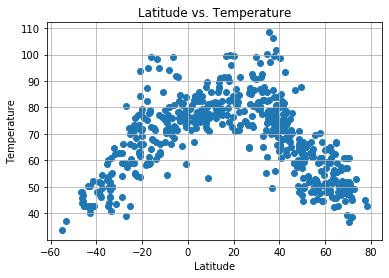

In [27]:


plt.scatter(weather_df["Latitude"], weather_df["Temperature (F)"])
plt.title(f"Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True) 
plt.savefig("LatitudevsTemperature.png")
plt.show()

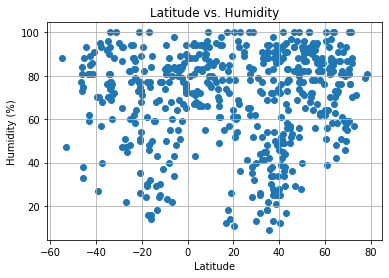

In [28]:

plt.scatter(weather_df["Latitude"], weather_df["Humidity (%)"])
plt.title(f"Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True) 
plt.savefig("LatitudevsHumidity.png")
plt.show()

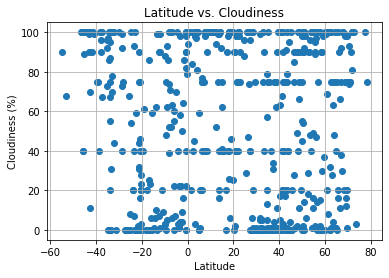

In [10]:

plt.scatter(weather_df["Latitude"], weather_df["Cloudiness (%)"])
plt.title(f"Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True) 
plt.savefig("LatitudevsCloudiness.png")
plt.show()

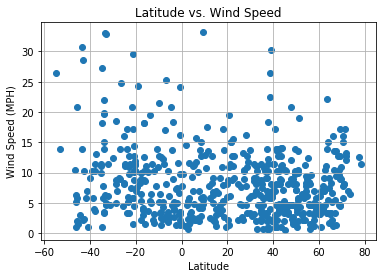

In [11]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed (MPH)"])
plt.title(f"Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True) 
plt.savefig("LatitudevsWind Speed.png")
plt.show()

In [29]:
northern_df = weather_df.loc[weather_df["Latitude"] > 0, :]
print(northern_df)

southern_df = weather_df.loc[weather_df["Latitude"] < 0, :]
print(southern_df)

                      City Country  Latitude  Longitude  Temperature (F)  \
4                Ilulissat      GL     69.22     -51.10            51.80   
5          Aleksandrov Gay      RU     50.15      48.57            62.65   
7                   Evensk      RU     61.95     159.23            48.78   
8                Saskylakh      RU     71.92     114.08            44.92   
9            San Cristobal      VE      7.77     -72.22            87.80   
..                     ...     ...       ...        ...              ...   
541                Griffin      US     33.25     -84.26            87.89   
542                   Khor      RU     47.89     134.95            57.65   
543  Melito di Porto Salvo      IT     37.92      15.77            79.18   
544            Constantine      DZ     36.37       6.61            78.80   
545               Balibago      PH     15.16     120.60            77.47   

     Humidity (%)  Cloudiness (%)  Wind Speed (MPH)  
4              50              75

R squared: 0.535808869677308


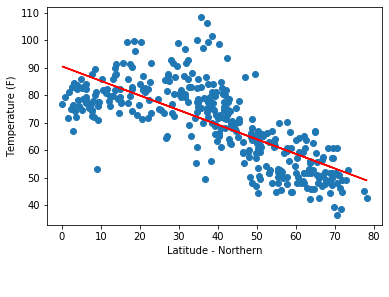

In [30]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = northern_df["Latitude"].astype('float')
y_values = northern_df["Temperature (F)"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),color="red")

# Label plot
plt.xlabel('Latitude - Northern')
plt.ylabel('Temperature (F)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.6063483938602849


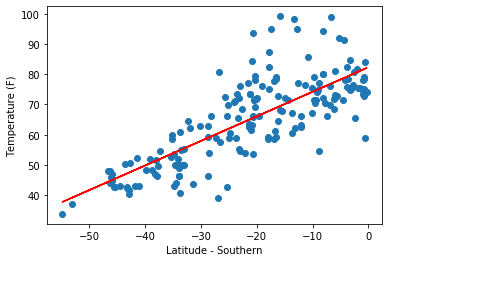

In [31]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = southern_df["Latitude"].astype('float')
y_values = southern_df["Temperature (F)"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),color="red")

# Label plot
plt.xlabel('Latitude - Southern')
plt.ylabel('Temperature (F)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.0012374333064264697


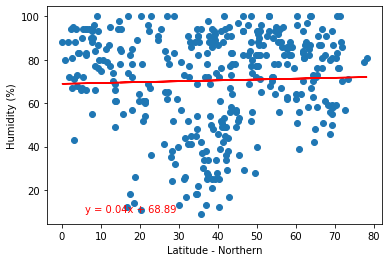

In [32]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = northern_df["Latitude"].astype('float')
y_values = northern_df["Humidity (%)"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),color="red")

# Label plot
plt.xlabel('Latitude - Northern')
plt.ylabel('Humidity (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.01399770520681199


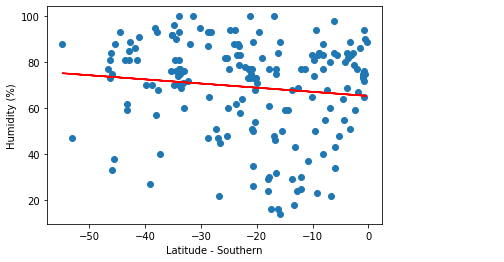

In [33]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = southern_df["Latitude"].astype('float')
y_values = southern_df["Humidity (%)"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),color="red")

# Label plot
plt.xlabel('Latitude - Southern')
plt.ylabel('Humidity (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.006816247616880507


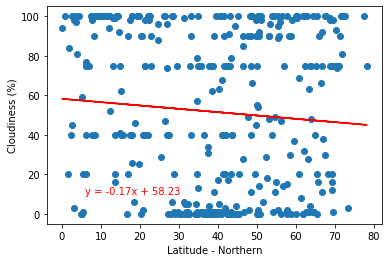

In [34]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = northern_df["Latitude"].astype('float')
y_values = northern_df[ "Cloudiness (%)"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),color="red")

# Label plot
plt.xlabel('Latitude - Northern')
plt.ylabel( "Cloudiness (%)")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.0930987851193517


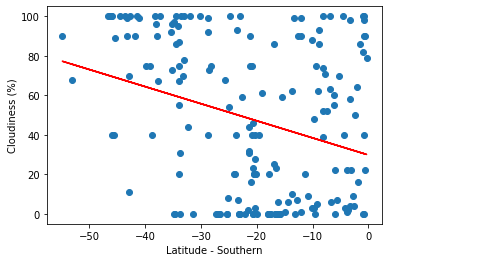

In [35]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = southern_df["Latitude"].astype('float')
y_values = southern_df[ "Cloudiness (%)"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),color="red")

# Label plot
plt.xlabel('Latitude - Southern')
plt.ylabel( "Cloudiness (%)")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.00042758779205424543


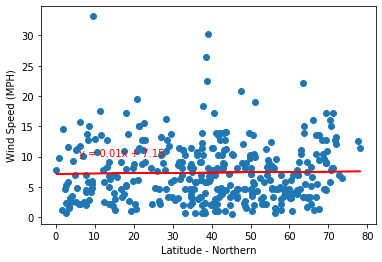

In [36]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = northern_df["Latitude"].astype('float')
y_values = northern_df[ "Wind Speed (MPH)"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),color="red")

# Label plot
plt.xlabel('Latitude - Northern')
plt.ylabel("Wind Speed (MPH)")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.037294317084532874


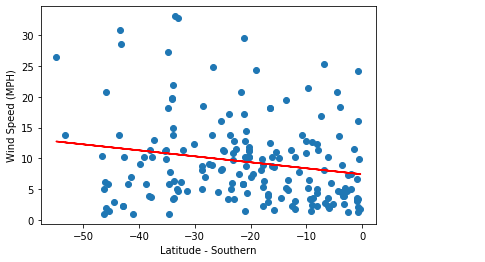

In [37]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = southern_df["Latitude"].astype('float')
y_values = southern_df[ "Wind Speed (MPH)"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),color="red")

# Label plot
plt.xlabel('Latitude - Southern')
plt.ylabel("Wind Speed (MPH)")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()